<a href="https://colab.research.google.com/github/RaharditoDio/Business-Intelligence-Assignment/blob/main/Assignment_Day_9_10_Rahardito_Dio_Prastowo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
!pip install scikit-plot
!pip install shap
!pip install eli5
!pip install lime
!pip install -U xgboost
!pip install dalex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
# import pandas for data wrangling
import pandas as pd
pd.set_option("max_columns",None)
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree
# import dalex
import dalex as dx

# import xgboost classifier
from xgboost import XGBClassifier

# load scikit-plot modules
import scikitplot as skplt

# load shap package for shap explanation
import shap

# load eli5
import eli5

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer 

In [128]:
# load dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")
dataset

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       10/17/2014           OH   
1                   228   42         342868        6/27/2006           IN   
2                   134   29         687698         9/6/2000           OH   
3                   256   41         227811        5/25/1990           IL   
4                   228   44         367455         6/6/2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851        7/16/1991           OH   
996                 285   41         186934         1/5/2014           IL   
997                 130   34         918516        2/17/2003           OH   
998                 458   62         533940       11/18/2011           IL   
999                 456   60         556080       11/11/1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0       1/25/2015  Single Vehicle Collision   Side Collision   
1       1/21/2015             Vehicle Theft                ?   
2       2/22/2015   Multi-vehicle Collision   Rear Collision   
3       1/10/2015  Single Vehicle Collision  Front Collision   
4       2/17/2015             Vehicle Theft                ?   
..   

In [129]:
# check data dimension
dataset.shape

(1000, 39)

# Nomor 1

**Identifikasi berapa banyak nilai null yang terdapat di dalam dataset. Perhatian: nilai null pada dataset tidak selalu NA atau NULL (10 poin)**

In [130]:
# check dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [131]:
# check null values
dataset.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [132]:
# check duplicated data
dataset.duplicated().sum()

0

**No null value was found, but we need to make sure that there are other terms besides null value**

In [133]:
# change data type to datetime
dataset['policy_bind_date'] = pd.to_datetime(dataset['policy_bind_date'])
dataset['incident_date'] = pd.to_datetime(dataset['incident_date'])

In [134]:
# show unique value from each column
for x in dataset.columns:
  print(f'unique value from {x}')
  print(f'{dataset[x].unique()}')
  print()
        

unique value from months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 4

In [135]:
# recplace '?' with null value
dataset = dataset.replace('?', np.nan)

**Based on the results of the exploration of the dataset, it was found that there are several null values ​​labeled with the "?" sign then we replace to null value**

# Nomor 2

**Perform treatment on columns that have NA or NULL values. Give your reasons why you do certain treatment on the NA value. (10 points)**

In [136]:
# check null values
dataset.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [137]:
# recplace '?' with string null value (label)
dataset = dataset.fillna('Null')

dataset.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

**Based on the results of the exploration of the dataset, it was found that there are several null values ​​labeled with the "?" sign, so for the purposes of further analysis, we will replace the label to "null" for further analysis because it is possible that the null value represents a certain condition that causes fraud or vice versa**

# Nomor 3

**Perform analysis on several predictor variables and interpret the analysis by relating the analysis to the target variable. Choose several variables that will be used for modeling based on the results of the analysis. (20 points)**


In [138]:
# make the policy number column as table index
dataset = dataset.set_index('policy_number')
dataset.head()

months_as_customer  age policy_bind_date policy_state  \
policy_number                                                          
521585                        328   48       2014-10-17           OH   
342868                        228   42       2006-06-27           IN   
687698                        134   29       2000-09-06           OH   
227811                        256   41       1990-05-25           IL   
367455                        228   44       2014-06-06           IL   

              policy_csl  policy_deductable  policy_annual_premium  \
policy_number                                                        
521585           250/500               1000                1406.91   
342868           250/500               2000                1197.22   
687698           100/300               2000                1413.14   
227811           250/500               2000                1415.74   
367455          500/1000               1000                1583.91   

               umbrella_limit  insured_zip insured_sex  \
policy_number                                            
521585                      0       466132        MALE   
342868                5000000       468176        MALE   
687698                5000000       430632      FEMALE   
227811                6000000       608117      FEMALE   
367455                6000000       610706        MALE   

              insured_education_level insured_occupation insured_hobbies  \
policy_number                                                              
521585                             MD       craft-repair        sleeping   
342868                             MD  machine-op-inspct         reading   
687698                            PhD              sales     board-games   
227811                            PhD       armed-forces     board-games   
367455                      Associate              sales     board-games   

              insured_relationship  capital-gains  capital-loss incident_date  \
policy_number                                                                   
521585                     husband          53300             0    2015-01-25   
342868              other-relative              0             0    2015-01-21   
687698                   own-child          35100             0    2015-02-22   
227811                   unmarried          48900        -62400    2015-01-10   
367455                   unmarried          66000        -46000    2015-02-17   

                          incident_type   collision_type incident_severity  \
policy_number                                                                
521585         Single Vehicle Collision   Side Collision      Major Damage   
342868                    Vehicle Theft             Null      Minor Damage   
687698          Multi-vehicle Collision   Rear Collision      Minor Damage   
227811         Single Vehicle Collision  Front Collision      Major Damage   
367455                    Vehicle Theft             Null      Minor Damage   

              authorities_contacted incident_state incident_city  \
policy_number                                                      
521585                       Police             SC      Columbus   
342868                       Police             VA     Riverwood   
687698                       Police             NY      Columbus   
227811                       Police             OH     Arlington   
367455                         None             NY     Arlington   

               incident_location  incident_hour_of_the_day  \
policy_number                                                
521585            9935 4th Drive                         5   
342868              6608 MLK Hwy                         8   
687698         7121 Francis Lane                         7   
227811          6956 Maple Drive                         5   
367455              3041 3rd Ave                        20   

               number_of_vehicles_involved property_

In [139]:
# replace value in fraud_reported column from Y & N to 1 & 0
dataset['fraud_reported'] = dataset['fraud_reported'].replace(['Y','N'],[1,0])
dataset['fraud_reported'].unique()

array([1, 0])

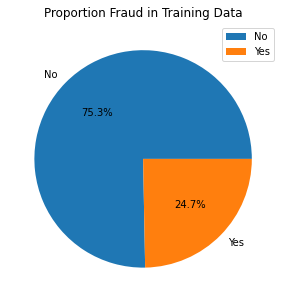

In [140]:
# show proportion of fraud_reported value in train data and test data
plt.figure(figsize = (8,8))
plt.subplot(121)
plt.pie(dataset['fraud_reported'].value_counts(), autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title('Proportion Fraud in Training Data')

plt.legend()
plt.tight_layout()
plt.show()

In [141]:
dataset.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [142]:
data_numeric = dataset.select_dtypes(exclude='object').columns
data_categoric = dataset.select_dtypes(include='object').columns

## Data Numerical Exploratory

In [143]:
data_numeric

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_date',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

No handles with labels found to put in legend.


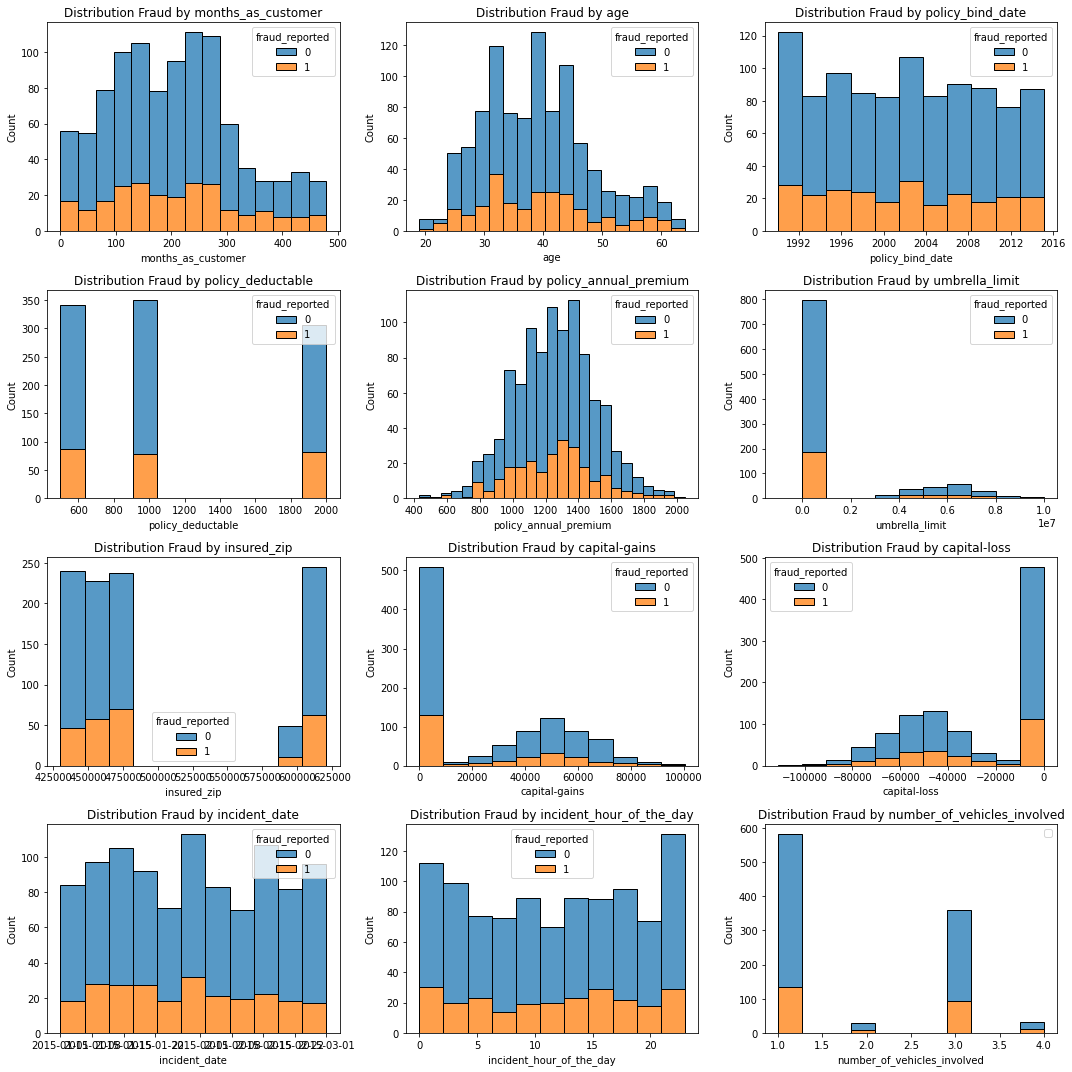

In [144]:
# show distribution of fraud_reported value
plt.figure(figsize=(15,15))

for x in range(0,len(data_numeric[0:12])):
  plt.subplot(4, 3, x+1)
  sns.histplot(data = dataset, x = dataset[data_numeric[x]], hue = 'fraud_reported', element = 'bars', multiple = 'stack')
  plt.title(f'Distribution Fraud by {data_numeric[x]}')
  plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


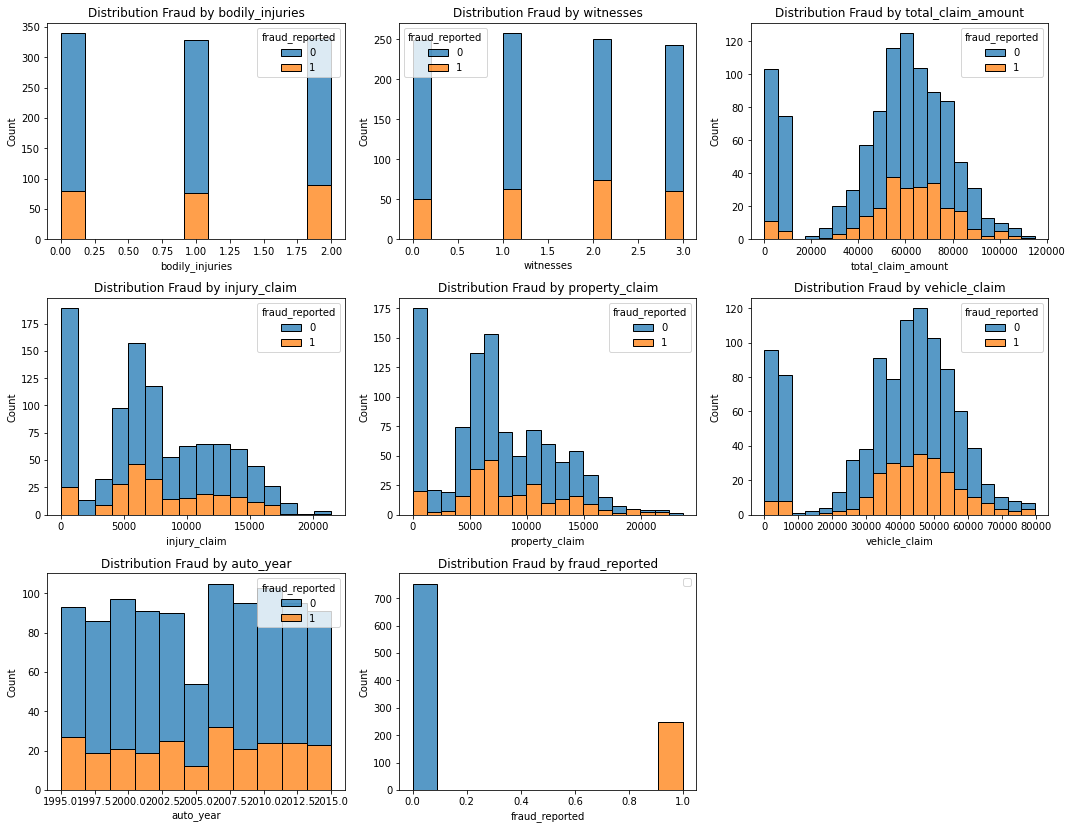

In [145]:
# show distribution of fraud_reported value
plt.figure(figsize=(15,15))

for x in range(0,len(data_numeric[12:])):
  plt.subplot(4, 3, x+1)
  sns.histplot(data = dataset, x = dataset[data_numeric[12:][x]], hue = 'fraud_reported', element = 'bars', multiple = 'stack')
  plt.title(f'Distribution Fraud by {data_numeric[12:][x]}')
  plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


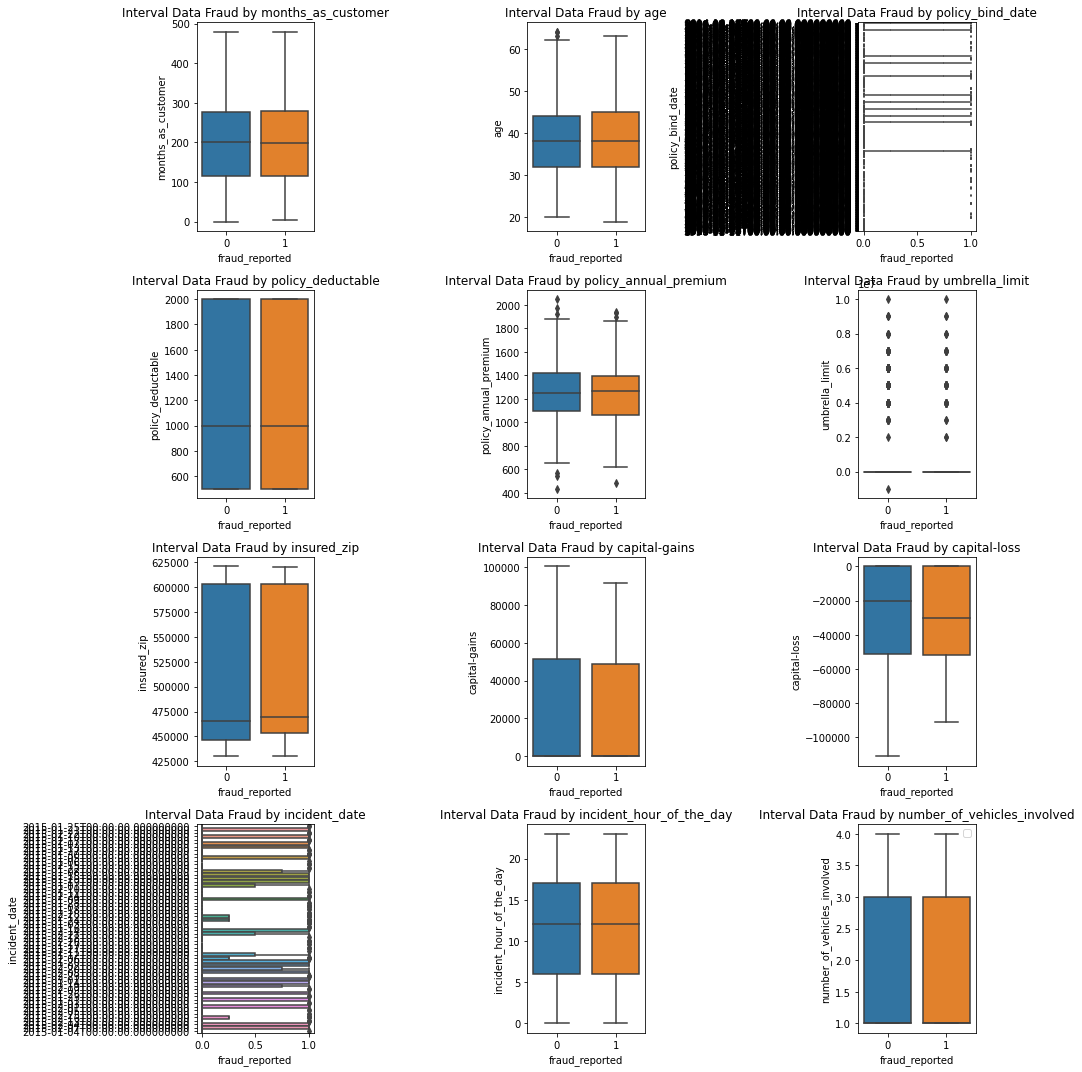

In [146]:
# show interval of fraud_reported value
plt.figure(figsize=(15,15))

for x in range(0,len(data_numeric[0:12])):
  plt.subplot(4, 3, x+1)
  sns.boxplot(data = dataset, y = dataset[data_numeric[x]], x = 'fraud_reported')
  plt.title(f'Interval Data Fraud by {data_numeric[x]}')
  plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


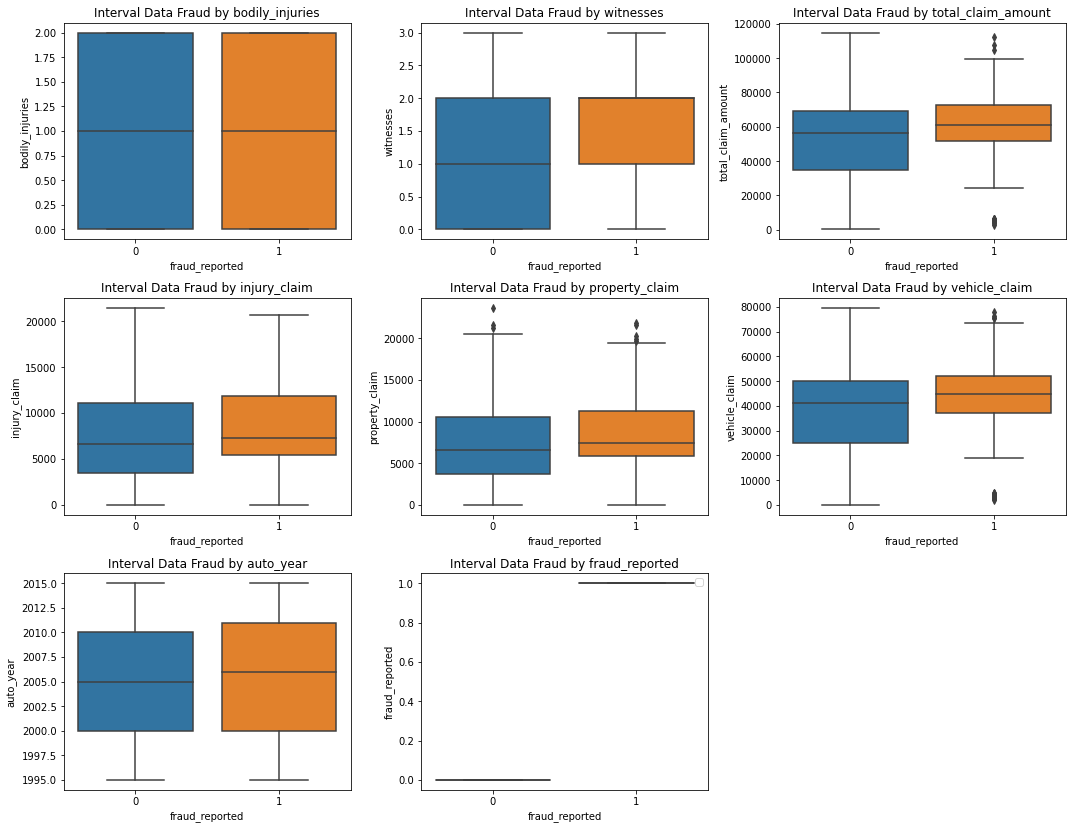

In [147]:
# show interval of fraud_reported value
plt.figure(figsize=(15,15))

for x in range(0,len(data_numeric[12:])):
  plt.subplot(4, 3, x+1)
  sns.boxplot(data = dataset, y = dataset[data_numeric[12:][x]], x = 'fraud_reported')
  plt.title(f'Interval Data Fraud by {data_numeric[12:][x]}')
  plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [148]:
dataset[['age', 'policy_annual_premium', 'insured_zip', 'capital-gains', 'capital-loss', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']].head()

age  policy_annual_premium  insured_zip  capital-gains  \
policy_number                                                           
521585          48                1406.91       466132          53300   
342868          42                1197.22       468176              0   
687698          29                1413.14       430632          35100   
227811          41                1415.74       608117          48900   
367455          44                1583.91       610706          66000   

               capital-loss  witnesses  total_claim_amount  injury_claim  \
policy_number                                                              
521585                    0          2               71610          6510   
342868                    0          0                5070           780   
687698                    0          3               34650          7700   
227811               -62400          2               63400          6340   
367455               -46000          1                6500          1300   

               property_claim  vehicle_claim  auto_year  
policy_number                                            
521585                  13020          52080       2004  
342868                    780           3510       2007  
687698                   3850          23100       2007  
227811                   6340          50720       2014  
367455                    650           4550       2009

**The chosen numeric predictors include :**

**('age', 'policy_annual_premium', 'insured_zip', 'capital-gains', 'capital-loss', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year')**

**this is due to there is significant difference in average between fraud and non-fraud data**

## Data Categorical Exploratory

In [149]:
data_categoric

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')

In [150]:
data_fraud = dataset.loc[dataset['fraud_reported'] == 1]

In [151]:
data_categoric = data_fraud.select_dtypes(include='object').columns

No handles with labels found to put in legend.


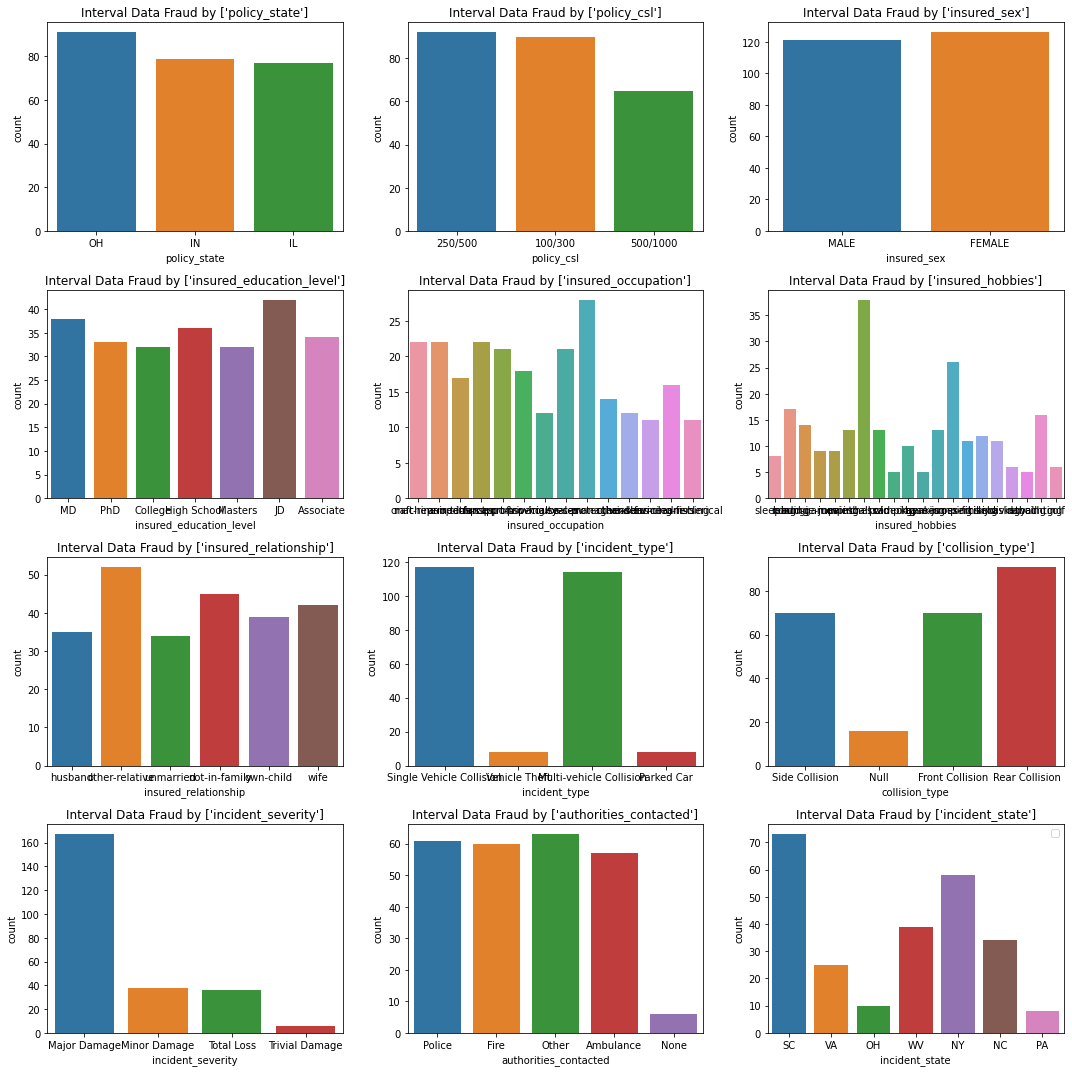

In [152]:
# show interval of fraud_reported value
plt.figure(figsize=(15,15))

for x in range(0,len(data_categoric[0:12])):
  plt.subplot(4, 3, x+1)
  sns.countplot(x=data_fraud[data_categoric[x]], data=data_fraud)
  plt.title(f'Interval Data Fraud by {[data_categoric[x]]}')
  plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

No handles with labels found to put in legend.


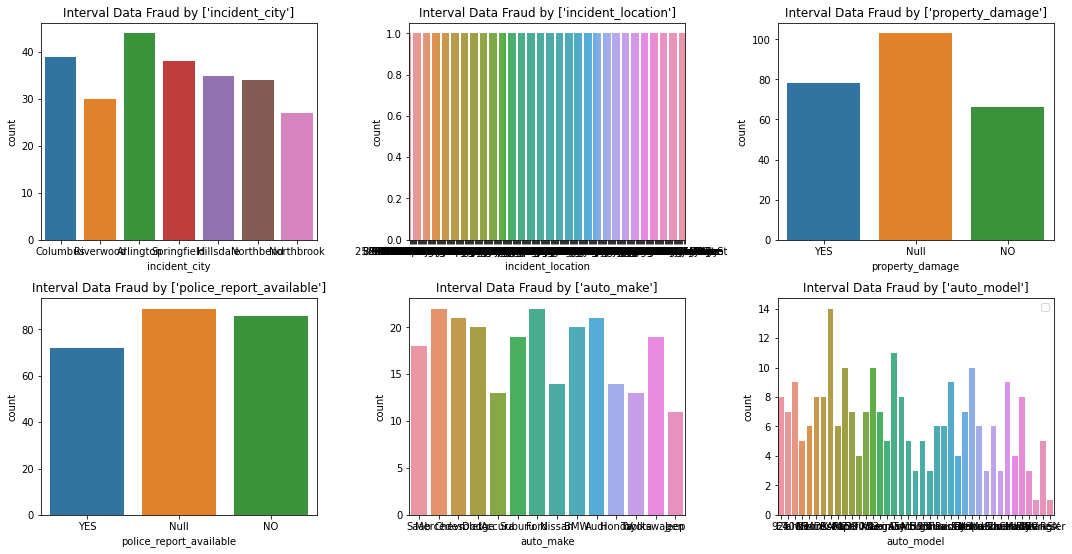

In [153]:
# show interval of fraud_reported value
plt.figure(figsize=(15,15))

for x in range(0,len(data_categoric[12:])):
  plt.subplot(4, 3, x+1)
  sns.countplot(x=data_fraud[data_categoric[12:][x]], data=data_fraud)
  plt.title(f'Interval Data Fraud by {[data_categoric[12:][x]]}')
  plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [154]:
dataset[['policy_csl', 'insured_occupation', 'insured_hobbies', 'incident_type', 'collision_type', 'incident_severity', 'property_damage']].head()

policy_csl insured_occupation insured_hobbies  \
policy_number                                                 
521585           250/500       craft-repair        sleeping   
342868           250/500  machine-op-inspct         reading   
687698           100/300              sales     board-games   
227811           250/500       armed-forces     board-games   
367455          500/1000              sales     board-games   

                          incident_type   collision_type incident_severity  \
policy_number                                                                
521585         Single Vehicle Collision   Side Collision      Major Damage   
342868                    Vehicle Theft             Null      Minor Damage   
687698          Multi-vehicle Collision   Rear Collision      Minor Damage   
227811         Single Vehicle Collision  Front Collision      Major Damage   
367455                    Vehicle Theft             Null      Minor Damage   

              property_damage  
policy_number                  
521585                    YES  
342868                   Null  
687698                     NO  
227811                   Null  
367455                     NO

**The chosen categoric predictors include :**

**('policy_csl', 'insured_occupation', 'insured_hobbies', 'incident_type', 'collision_type', 'incident_severity', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_model')**

**this is due to there is significant difference in numbers between categories**

# Nomor 4

**Create a machine learning model with logistic regression and KNN as the baseline from the model, then random forest and XgBoost as the follow-up model. perform hyperparameter settings using the grid method with the following specifications for each model:**

In [155]:
DataModel = dataset[['age', 'policy_annual_premium', 'insured_zip', 'capital-gains', 'capital-loss', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'policy_csl', 'insured_hobbies', 'incident_type', 'collision_type', 'incident_severity', 'property_damage', 'fraud_reported']]
DataModel.head() 

age  policy_annual_premium  insured_zip  capital-gains  \
policy_number                                                           
521585          48                1406.91       466132          53300   
342868          42                1197.22       468176              0   
687698          29                1413.14       430632          35100   
227811          41                1415.74       608117          48900   
367455          44                1583.91       610706          66000   

               capital-loss  witnesses  total_claim_amount  injury_claim  \
policy_number                                                              
521585                    0          2               71610          6510   
342868                    0          0                5070           780   
687698                    0          3               34650          7700   
227811               -62400          2               63400          6340   
367455               -46000          1                6500          1300   

               property_claim  vehicle_claim  auto_year policy_csl  \
policy_number                                                        
521585                  13020          52080       2004    250/500   
342868                    780           3510       2007    250/500   
687698                   3850          23100       2007    100/300   
227811                   6340          50720       2014    250/500   
367455                    650           4550       2009   500/1000   

              insured_hobbies             incident_type   collision_type  \
policy_number                                                              
521585               sleeping  Single Vehicle Collision   Side Collision   
342868                reading             Vehicle Theft             Null   
687698            board-games   Multi-vehicle Collision   Rear Collision   
227811            board-games  Single Vehicle Collision  Front Collision   
367455            board-games             Vehicle Theft             Null   

              incident_severity property_damage  fraud_reported  
policy_number                                                    
521585             Major Damage             YES               1  
342868             Minor Damage            Null               1  
687698             Minor Damage              NO               0  
227811             Major Damage            Null               1  
367455             Minor Damage              NO               0

In [156]:
# ordinal category
tf_policy_csl = {'100/300':1,
                  '250/500':2,
                  '500/1000':3}

tf_incident_severity = {'Trivial Damage':1,
                     'Minor Damage':2,
                     'Total Loss':3,
                     'Major Damage':4}

DataModel['policy_csl'] = DataModel['policy_csl'].map(tf_policy_csl)
DataModel['incident_severity'] = DataModel['incident_severity'].map(tf_incident_severity)

In [157]:
# nominal category
cat_nom_col = ['insured_hobbies', 'collision_type', 'incident_type', 'property_damage']

# for trainig
dummies = pd.DataFrame()
for x in cat_nom_col:
  dummies = pd.get_dummies(DataModel[x], prefix = x+'_')
  DataModel = pd.concat([DataModel, dummies], axis=1)

# drop columns
DataModel = DataModel.drop(cat_nom_col, axis=1)

In [158]:
DataModel.head()

age  policy_annual_premium  insured_zip  capital-gains  \
policy_number                                                           
521585          48                1406.91       466132          53300   
342868          42                1197.22       468176              0   
687698          29                1413.14       430632          35100   
227811          41                1415.74       608117          48900   
367455          44                1583.91       610706          66000   

               capital-loss  witnesses  total_claim_amount  injury_claim  \
policy_number                                                              
521585                    0          2               71610          6510   
342868                    0          0                5070           780   
687698                    0          3               34650          7700   
227811               -62400          2               63400          6340   
367455               -46000          1                6500          1300   

               property_claim  vehicle_claim  auto_year  policy_csl  \
policy_number                                                         
521585                  13020          52080       2004           2   
342868                    780           3510       2007           2   
687698                   3850          23100       2007           1   
227811                   6340          50720       2014           2   
367455                    650           4550       2009           3   

               incident_severity  fraud_reported  \
policy_number                                      
521585                         4               1   
342868                         2               1   
687698                         2               0   
227811                         4               1   
367455                         2               0   

               insured_hobbies__base-jumping  insured_hobbies__basketball  \
policy_number                                                               
521585                                     0                            0   
342868                                     0                            0   
687698                                     0                            0   
227811                                     0                            0   
367455                                     0                            0   

               insured_hobbies__board-games  insured_hobbies__bungie-jumping  \
policy_number                                                                  
521585                                    0                                0   
342868                                    0                                0   
687698                                    1                                0   
227811                                    1                                0   
367455                                    1                                0   

               insured_hobbies__camping  insured_hobbies__chess  \
policy_number                                                     
521585                                0                       0   
342868                                0                       0   
687698                                0                       0   
227811                                0                       0   
367455                                0                       0   

               insured_hobbies__cross-fit  insured_hobbies__dancing  \
policy_number                                                         
521585                                  0                         0   
342868                                  0                         0   
687698                                  0                         0   
227811                                  0                         0   
367455                                  0                         0   

               insured_hobbies__exerci

In [159]:
DataModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      1000 non-null   int64  
 1   policy_annual_premium                    1000 non-null   float64
 2   insured_zip                              1000 non-null   int64  
 3   capital-gains                            1000 non-null   int64  
 4   capital-loss                             1000 non-null   int64  
 5   witnesses                                1000 non-null   int64  
 6   total_claim_amount                       1000 non-null   int64  
 7   injury_claim                             1000 non-null   int64  
 8   property_claim                           1000 non-null   int64  
 9   vehicle_claim                            1000 non-null   int64  
 10  auto_year                                

In [160]:
DataModel.select_dtypes(include=['uint8']).columns

Index(['insured_hobbies__base-jumping', 'insured_hobbies__basketball',
       'insured_hobbies__board-games', 'insured_hobbies__bungie-jumping',
       'insured_hobbies__camping', 'insured_hobbies__chess',
       'insured_hobbies__cross-fit', 'insured_hobbies__dancing',
       'insured_hobbies__exercise', 'insured_hobbies__golf',
       'insured_hobbies__hiking', 'insured_hobbies__kayaking',
       'insured_hobbies__movies', 'insured_hobbies__paintball',
       'insured_hobbies__polo', 'insured_hobbies__reading',
       'insured_hobbies__skydiving', 'insured_hobbies__sleeping',
       'insured_hobbies__video-games', 'insured_hobbies__yachting',
       'collision_type__Front Collision', 'collision_type__Null',
       'collision_type__Rear Collision', 'collision_type__Side Collision',
       'incident_type__Multi-vehicle Collision', 'incident_type__Parked Car',
       'incident_type__Single Vehicle Collision',
       'incident_type__Vehicle Theft', 'property_damage__NO',
       'property

In [161]:
for x in DataModel.select_dtypes(include=['uint8']).columns:
  DataModel[x] = DataModel[x].astype('int')

In [162]:
DataModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 521585 to 556080
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      1000 non-null   int64  
 1   policy_annual_premium                    1000 non-null   float64
 2   insured_zip                              1000 non-null   int64  
 3   capital-gains                            1000 non-null   int64  
 4   capital-loss                             1000 non-null   int64  
 5   witnesses                                1000 non-null   int64  
 6   total_claim_amount                       1000 non-null   int64  
 7   injury_claim                             1000 non-null   int64  
 8   property_claim                           1000 non-null   int64  
 9   vehicle_claim                            1000 non-null   int64  
 10  auto_year                                

In [163]:
X = DataModel.drop(['fraud_reported'], axis=1).copy()
y = DataModel['fraud_reported'].values

In [164]:
# check y dimension
y.shape

(1000,)

In [165]:
# check X dimension
X.shape

(1000, 44)

In [166]:
# split data to train and test data
# with test size is 30% of overall data
# use stratified sampling
# and set RNG to 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    stratify = y,
    random_state = 1000,
)

In [167]:
# Check X_train dimension
X_train.shape

(700, 44)

In [168]:
# check y_train class distribution
np.unique(y_train, return_counts=True)[1]

array([527, 173])

In [169]:
# check X_test dimension
X_test.shape

(300, 44)

In [170]:
# check y_test class distribution
np.unique(y_test, return_counts=True)[1]

array([226,  74])

In [171]:
y_train.shape

(700,)

## Logistic Regression

In [172]:
# load logistic regression model
from sklearn.linear_model import LogisticRegression

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

In [174]:
# define logistic regression model
logistic_reg = LogisticRegression()

# fit model to data
random_grid = {'penalty':['elasticnet','l2'],
               'fit_intercept':[True, False],
               'C': [0.25, 0.5, 0.75, 1.0]}

scoreFunction = {'f1': 'f1'}
random_search = RandomizedSearchCV(logistic_reg,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,
                                   refit = 'f1',
                                   return_train_score = False,
                                   random_state = 1000,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV')

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.



Finished RandomizedSearchCV


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [175]:
random_search.best_params_

{'C': 0.25, 'fit_intercept': False, 'penalty': 'l2'}

In [176]:
random_search.best_estimator_

LogisticRegression(C=0.25, fit_intercept=False)

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       527
           1       0.83      0.06      0.11       173

    accuracy                           0.76       700
   macro avg       0.80      0.53      0.49       700
weighted avg       0.78      0.76      0.68       700



Text(33.0, 0.5, 'Condition')

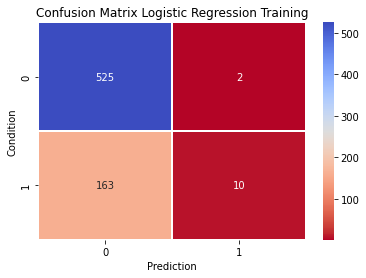

In [177]:
# predict training
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train, random_search.predict(X_train)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix Logistic Regression Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [178]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on train data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg Forest on train data: ', round(gini_value*100, 2), '%')

AUC for Logreg on train data:  64.04 %
Gini for Logreg Forest on train data:  28.08 %


              precision    recall  f1-score   support

           0       0.76      0.99      0.86       226
           1       0.50      0.03      0.05        74

    accuracy                           0.75       300
   macro avg       0.63      0.51      0.45       300
weighted avg       0.69      0.75      0.66       300



Text(33.0, 0.5, 'Condition')

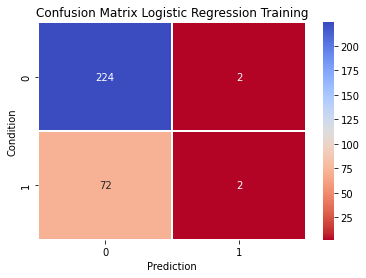

In [179]:
# predict testing
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test, random_search.predict(X_test)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix Logistic Regression Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [180]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logistic Regression on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logistic Regression on test data: ', round(gini_value*100, 2), '%')

AUC for Logistic Regression on test data:  52.4 %
Gini for Logistic Regression on test data:  4.8 %


## KNN

In [181]:
# define KNN model
knn = KNeighborsClassifier()

# params
random_grid = {'n_neighbors' : [2, 3, 4, 5],
               'p':[1,2]}

scoreFunction = {'f1': 'f1'}
random_search = RandomizedSearchCV(knn,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,
                                   refit = 'f1',
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV')

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Finished RandomizedSearchCV


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       527
           1       0.66      0.45      0.53       173

    accuracy                           0.81       700
   macro avg       0.75      0.69      0.71       700
weighted avg       0.79      0.81      0.79       700



Text(33.0, 0.5, 'Condition')

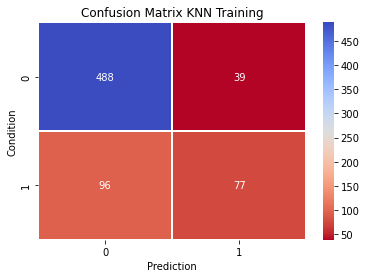

In [182]:
# predict training
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train, random_search.predict(X_train)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix KNN Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [183]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for KNN on train data: ', round(roc_auc_value*100, 2), '%')
print('Gini for KNN on train data: ', round(gini_value*100, 2), '%')

AUC for KNN on train data:  84.52 %
Gini for KNN on train data:  69.04 %


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       226
           1       0.30      0.19      0.23        74

    accuracy                           0.69       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.65      0.69      0.67       300



Text(33.0, 0.5, 'Condition')

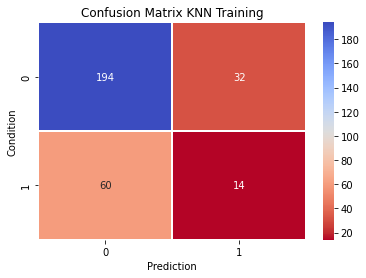

In [184]:
# predict testing
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test, random_search.predict(X_test)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix KNN Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [185]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for KNN on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for KNN on test data: ', round(gini_value*100, 2), '%')

AUC for KNN on test data:  53.3 %
Gini for KNN on test data:  6.6 %


## Random Forest

In [186]:
# define Random Forest model
rf = RandomForestClassifier()

# params
random_grid = {'n_estimators': [10, 50, 100, 1000],
               'criterion': ['gini', 'entropy'],
               'max_depth': [3, 5, 10, None],
               'max_features': ['sqrt', 'log2']}

scoreFunction = {'f1': 'f1'}
random_search = RandomizedSearchCV(rf,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,
                                   refit = 'f1',
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV')

Fitting 3 folds for each of 64 candidates, totalling 192 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.



Finished RandomizedSearchCV


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       173

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



Text(33.0, 0.5, 'Condition')

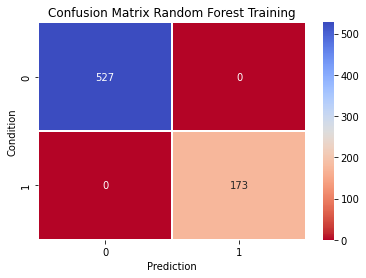

In [187]:
# predict training
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train, random_search.predict(X_train)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix Random Forest Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [188]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest on train data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest on train data: ', round(gini_value*100, 2), '%')

AUC for Random Forest on train data:  100.0 %
Gini for Random Forest on train data:  100.0 %


              precision    recall  f1-score   support

           0       0.87      0.89      0.88       226
           1       0.65      0.61      0.63        74

    accuracy                           0.82       300
   macro avg       0.76      0.75      0.76       300
weighted avg       0.82      0.82      0.82       300



Text(33.0, 0.5, 'Condition')

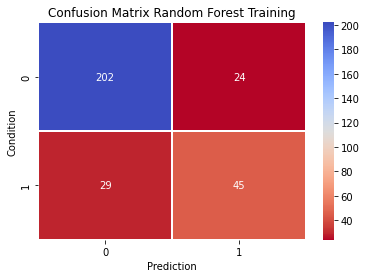

In [189]:
# predict testing
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test, random_search.predict(X_test)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix Random Forest Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [190]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Random Forest on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Random Forest on test data: ', round(gini_value*100, 2), '%')

AUC for Random Forest on test data:  84.38 %
Gini for Random Forest on test data:  68.76 %


## XGBoost

In [191]:
xgb = XGBClassifier(error_score = 'raise')

# params
random_grid = {'n_estimators': [10, 50, 100],
               'learning_rate': [0.1, 0.05, 0.01],
               'max_depth': [3, 5, 10],
               'grow_policy': ['depthwise', 'lossguide']}

scoreFunction = {'f1': 'f1'}

random_search = RandomizedSearchCV(xgb,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,
                                   refit = 'f1',
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1)

random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV')

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning:

The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.



[04:46:30] WARNING: ../src/learner.cc:627: 
Parameters: { "error_score" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Finished RandomizedSearchCV


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       173

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



Text(33.0, 0.5, 'Condition')

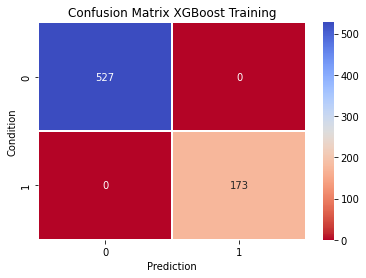

In [192]:
# predict training
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train, random_search.predict(X_train)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix XGBoost Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [193]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for XGBoost on train data: ', round(roc_auc_value*100, 2), '%')
print('Gini for XGBoost on train data: ', round(gini_value*100, 2), '%')

AUC for XGBoost on train data:  100.0 %
Gini for XGBoost on train data:  100.0 %


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       226
           1       0.63      0.66      0.64        74

    accuracy                           0.82       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.82      0.82      0.82       300



Text(33.0, 0.5, 'Condition')

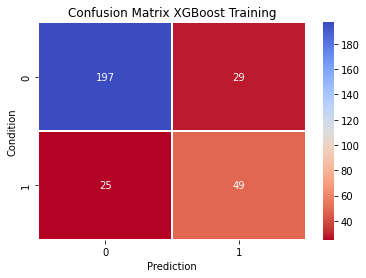

In [194]:
# predict testing
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test, random_search.predict(X_test)))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix XGBoost Training')
plt.xlabel('Prediction')
plt.ylabel('Condition')

In [195]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for XGBoost on test data: ', round(roc_auc_value*100, 2), '%')
print('Gini for XGBoost Forest on test data: ', round(gini_value*100, 2), '%')

AUC for XGBoost on test data:  85.76 %
Gini for XGBoost Forest on test data:  71.52 %


In [196]:
# Calculate G Means
gmean = np.sqrt(true_positive_rate * (1 - false_positive_rate))

# find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(threshold[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
truePositiveOpt = round(true_positive_rate[index], ndigits = 4)
falsePositiveOpt = round(false_positive_rate[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('True Positive Rate: {}, False Positive Rate: {}'.format(truePositiveOpt, falsePositiveOpt))


Best Threshold: 0.15600000321865082 with G-Mean: 0.8036
True Positive Rate: 0.8108, False Positive Rate: 0.2035


### Threshold

In [197]:
Threshold = 0.3458000123500824 

y_pred_threshold = np.where(random_search.predict_proba(X_test)[:,1]>=Threshold,1,0)

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       226
           1       0.63      0.72      0.67        74

    accuracy                           0.83       300
   macro avg       0.77      0.79      0.78       300
weighted avg       0.84      0.83      0.83       300



Text(33.0, 0.5, 'Condition')

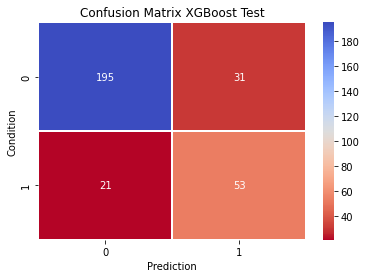

In [198]:
# predict test
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_threshold)
print(metrics.classification_report(y_test, y_pred_threshold))
sns.heatmap(cnf_matrix, cmap='coolwarm_r', annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix XGBoost Test')
plt.xlabel('Prediction')
plt.ylabel('Condition')

**The best model evaluation results are obtained with the XGBoost model based on the F-1 Score and ROC**

# Nomor 5

**Interpretasikan model terbaik (berdasarkan f1-score) yang diperoleh pada model poin 4 berdasarkan teknik yang sesuai dengan modelnya: Jika modelnya model linear atau interpretable model maka gunakanlah teknik model dependent interpretation, tapi jika menggunakan model tidak interpretable maka gunakan feature importance dan partial dependence plot. Berikan rekomendasi terkait bagaimana cara mengidentifikasi nasabah yang melakukan fraud berdasarkan hasil interpretasi. (20 poin)**

## Feature Importance

In [199]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'importance': random_search.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)

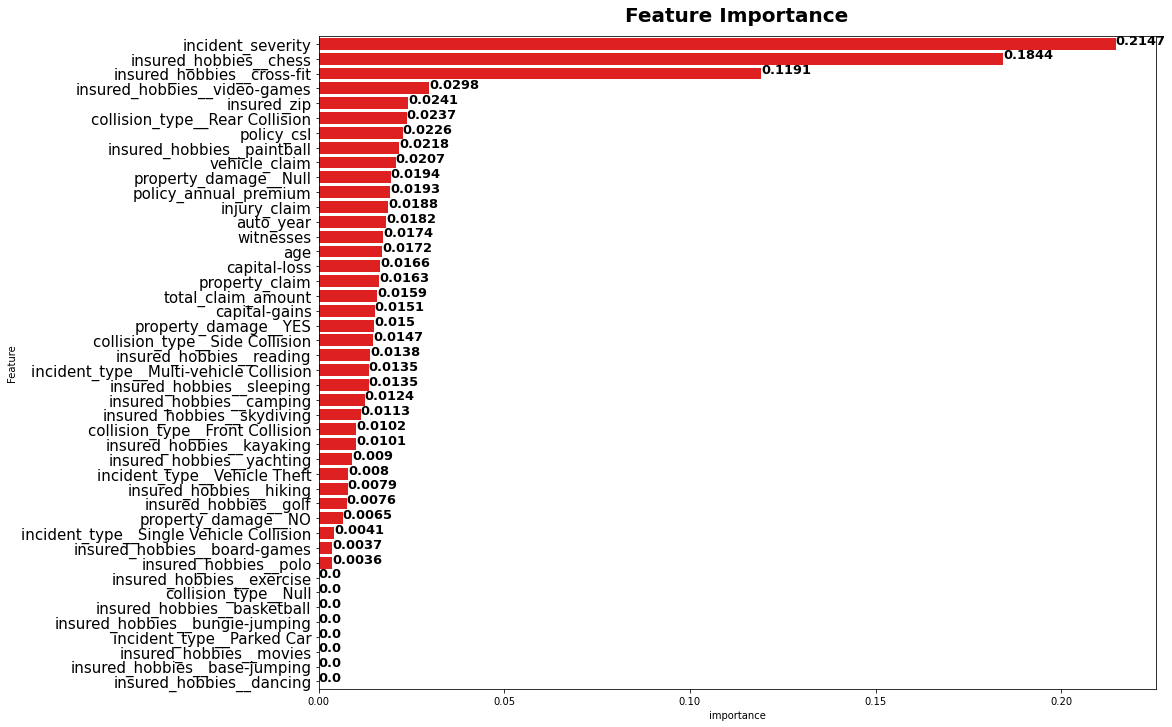

In [200]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='importance', y='Feature', color='red')

# function to add value labels
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['importance'])
y = list(feature_importance['Feature'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x,y)
plt.show()

## Partial Dependent *Plot*

In [201]:
# initial explainer
fraud_xgb_exp = dx.Explainer(random_search.best_estimator_, X_train, y_train, label = 'XGBoost Explanantion')

Preparation of a new explainer is initiated

  -> data              : 700 rows 44 cols
  -> target variable   : 700 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Explanantion
  -> predict function  : <function yhat_proba_default at 0x7fbd97d50b00> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00138, mean = 0.247, max = 0.99
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.238, mean = -0.000266, max = 0.358
  -> model_info        : package xgboost

A new explainer has been created!


In [202]:
fraud_xgb_exp.model_parts().plot()

In [203]:
fraud_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 44/44 [00:05<00:00,  8.72it/s]


**Based on the feature importance analysis, incident severity becomes a predictor that must be a concern to determine fraud or not. If we look at the data exploration graph, what we have to consider is when incident severity is of the major damage type. Another factor is there are 2 customers with certain hobbies (chess and cross fit) which shows indications of conditions that must be suspected of being fraud**

# Nomor 6

Gunakan LIME untuk melaukan interpretasi lokal pada beberapa nomor polis berikut:
a.	527945
b.	235220
c.	605100
Berikan interpretasinya (10 poin)

In [204]:
# define XGBoost explainer with lime module
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names = ['fraud', 'non-fraud'],
    discretize_continuous = True,
    verbose = True
)

In [205]:
X_train

age  policy_annual_premium  insured_zip  capital-gains  \
policy_number                                                           
796005          36                1274.63       441298          51000   
184938          28                1340.56       433184              0   
615047          47                1386.93       457130          54100   
593466          60                1064.49       462804          73500   
454086          36                1152.40       615921          39600   
...            ...                    ...          ...            ...   
999435          29                1091.73       601213          36100   
598308          45                1333.97       620819          61100   
208298          28                 773.99       458727              0   
556270          37                1331.94       433974              0   
265026          24                 922.67       473611          47400   

               capital-loss  witnesses  total_claim_amount  injury_claim  \
policy_number                                                              
796005                    0          3               52030          9460   
184938                    0          2               58140          6460   
615047               -77600          0               65800         13160   
593466               -43300          1               62880          5240   
454086               -82400          3                6160           560   
...                     ...        ...                 ...           ...   
999435               -42300          2               49950          5550   
598308               -30700          0               61050         11100   
208298               -70300          2                3200           640   
556270               -55400          2               54560          9920   
265026                    0          1               65520          9360   

               property_claim  vehicle_claim  auto_year  policy_csl  \
policy_number                                                         
796005                   9460          33110       1995           2   
184938                   6460          45220       2008           2   
615047                   6580          46060       2001           2   
593466                  10480          47160       2007           3   
454086                   1680           3920       2014           3   
...                       ...            ...        ...         ...   
999435                   5550          38850       2004           2   
598308                  11100          38850       2011           2   
208298                    320           2240       2014           2   
556270                   9920          34720       2004           3   
265026                   9360          46800       2011           1   

               incident_severity  insured_hobbies__base-jumping  \
policy_number                                                     
796005                         3                              0   
184938                         2                              0   
615047                         2                              0   
593466                         3                              0   
454086                         2                              0   
...                          ...                            ...   
999435                         2                              0   
598308                         4                              0   
208298                         1                              0   
556270                         3                              1   
265026                         4                              0   

               insured_hobbies__basketball  insured_hobbies__board-games  \
policy_number                                                              
796005                                   1                             0   
184938                                   0          

## a.	527945

In [206]:
# get the index of '527945'
loc_527945 = X_test.index.get_indexer_for((X_test[X_test.index == 527945].index))
loc_527945

array([253])

In [207]:
policy_number_527945 = X_test.iloc[253]
policy_number_527945

age                                            47.00
policy_annual_premium                        1307.11
insured_zip                                600648.00
capital-gains                                   0.00
capital-loss                                    0.00
witnesses                                       2.00
total_claim_amount                          59730.00
injury_claim                                10860.00
property_claim                              10860.00
vehicle_claim                               38010.00
auto_year                                    2005.00
policy_csl                                      2.00
incident_severity                               3.00
insured_hobbies__base-jumping                   0.00
insured_hobbies__basketball                     0.00
insured_hobbies__board-games                    0.00
insured_hobbies__bungie-jumping                 0.00
insured_hobbies__camping                        0.00
insured_hobbies__chess                        

In [208]:
# explain Random Forest prediction for user_id: 527945
lime_explainer.explain_instance(policy_number_527945, random_search.predict_proba).show_in_notebook(show_table=True)

Intercept 1.3587531137617561
Prediction_local [0.2199519]
Right: 0.21140279


## b.	235220

In [209]:
# get the index of '235220'
loc_235220 = X_train.index.get_indexer_for((X_train[X_train.index == 235220].index))
loc_235220

array([596])

In [210]:
policy_number_235220 = X_train.iloc[596]
policy_number_235220

age                                            25.00
policy_annual_premium                        1352.83
insured_zip                                464959.00
capital-gains                                   0.00
capital-loss                               -71700.00
witnesses                                       2.00
total_claim_amount                          64890.00
injury_claim                                 7210.00
property_claim                               7210.00
vehicle_claim                               50470.00
auto_year                                    2013.00
policy_csl                                      2.00
incident_severity                               2.00
insured_hobbies__base-jumping                   0.00
insured_hobbies__basketball                     0.00
insured_hobbies__board-games                    0.00
insured_hobbies__bungie-jumping                 0.00
insured_hobbies__camping                        0.00
insured_hobbies__chess                        

In [211]:
# explain Random Forest prediction for user_id: 235220
lime_explainer.explain_instance(policy_number_235220, random_search.predict_proba).show_in_notebook(show_table=True)

Intercept 1.4347240696232857
Prediction_local [0.11742816]
Right: 0.81678504


## c.	605100

In [212]:
# get the index of '605100'
loc_605100 = X_train.index.get_indexer_for((X_train[X_train.index == 605100].index))
loc_605100

array([505])

In [213]:
policy_number_605100 = X_train.iloc[505]
policy_number_605100

age                                            41.00
policy_annual_premium                        1042.25
insured_zip                                601206.00
capital-gains                                   0.00
capital-loss                               -44400.00
witnesses                                       3.00
total_claim_amount                          81240.00
injury_claim                                 6770.00
property_claim                              20310.00
vehicle_claim                               54160.00
auto_year                                    2008.00
policy_csl                                      1.00
incident_severity                               4.00
insured_hobbies__base-jumping                   0.00
insured_hobbies__basketball                     0.00
insured_hobbies__board-games                    0.00
insured_hobbies__bungie-jumping                 0.00
insured_hobbies__camping                        0.00
insured_hobbies__chess                        

In [214]:
# explain Random Forest prediction for user_id: 605100
lime_explainer.explain_instance(policy_number_605100, random_search.predict_proba).show_in_notebook(show_table=True)

Intercept 1.2224405075482192
Prediction_local [0.66744661]
Right: 0.9488823
